# **1. Data Understanding**

## **1.1 Giới thiệu bộ dữ liệu**
Dataset Hotel Booking Demand được sử dụng để phân tích hành vi đặt phòng
và tỷ lệ hủy booking trong ngành khách sạn.


## **1.2. Import thư viện & Load dữ liệu**

In [3]:
import pandas as pd

df = pd.read_csv("hotel_bookings.csv")

## **1.3. Thông tin tổng quan dataset**

In [5]:
df.shape # Số dòng số cột

(119390, 32)

In [6]:
df.info() # Thông tin cột

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


Bộ dữ liệu có:
* `199390` dòng và `32` cột
* Kiểu dữ liệu gồm numberic (`int64`, `float64`) và categorical (`object`) được biểu diễn
* Dữ liệu categorical chiếm chủ yếu thể hiện như:
  * `reservation_status`
  * `reservation_status_date`
  * `assigned_room_type`
  * `reserved_room_type`
  * `distribution_channel`
  * `market_segment`
  * `country`
  * `meal`
  * `arrival_date_month`
  * `hotel`

## **1.4. Mô tả thuộc tính**

#### **Mô tả các đặc trưng của bộ dữ liệu Hotel Booking Demand**
* **Đặc trưng về loại khách sạn**
  * `hotel` : Loại khách sạn: City Hotel hoặc Resort Hotel.
* **Đặc trưng về thời gian đặt phòng**
  * `is_canceled` : 1 = đặt phòng bị hủy, 0 = không hủy.
  * `lead_time` : Số ngày từ lúc đặt phòng đến ngày check-in.
  * `arrival_date_year` : Năm nhận phòng.
  * `arrival_date_month` : Tháng nhận phòng (January, February...).
  * `arrival_date_week_number` : Tuần trong năm (1–52).
  * `arrival_date_day_of_month` : Ngày trong tháng (1–31).
  * `stays_in_weekend_nights` : Số đêm lưu trú vào thứ 6–7.
  * `stays_in_week_nights` : Số đêm lưu trú vào các ngày trong tuần (Mon–Thu).
* **Đặc trưng về khách hàng**
  * `adults` : Số lượng người lớn.
  * `children` : Số lượng trẻ em.
  * `babies` : Số trẻ sơ sinh.
  * `meal` : Loại suất ăn (BB, HB, FB, SC…).
  * `country` : Quốc gia của khách (mã ISO).
  * `market_segment` : Phân khúc khách hàng (Online TA, Direct, Corporate…).
  * `distribution_channel` : Kênh phân phối (Direct, TA/TO…).
  * `is_repeated_guest` : 1 = khách quay lại, 0 = khách mới.
  * `previous_cancellations` : Số lần đặt trước đó bị hủy.
  * `previous_bookings_not_canceled` : Số đặt trước đó không bị hủy.
  * `reserved_room_type` : Loại phòng khách đặt.
  * `assigned_room_type` : Loại phòng được giao khi nhận phòng.
* **Đặc trưng về tài chính và giá phòng**
  * `booking_changes` : Số lần khách thay đổi đặt phòng.
  * `deposit_type` : Loại đặt cọc (No Deposit, Non Refund, Refundable).
  * `agent` : ID đại lý du lịch.
  * `company` : ID công ty (nếu đi theo đoàn công ty).
  * `adr` : Average Daily Rate: giá phòng trung bình mỗi đêm.
* **Đặc trưng về điều kiện đặt phòng**
  * `required_car_parking_spaces` : Số chỗ đỗ xe khách yêu cầu.
  * `total_of_special_requests` : Số yêu cầu đặc biệt (giường đôi, tầng cao…).
* **Đặc trưng về trạng thái đặt phòng**
  * `reservation_status` : Trạng thái: *Canceled*, *Check-Out*, *No-Show*.
  * `reservation_status_date` : Ngày ghi nhận trạng thái.


## **1.5. Kiểm tra chất lượng dữ liệu**

In [9]:
df.isnull().sum().sort_values(ascending=False)

,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


In [11]:
df.duplicated().sum()

np.int64(31994)

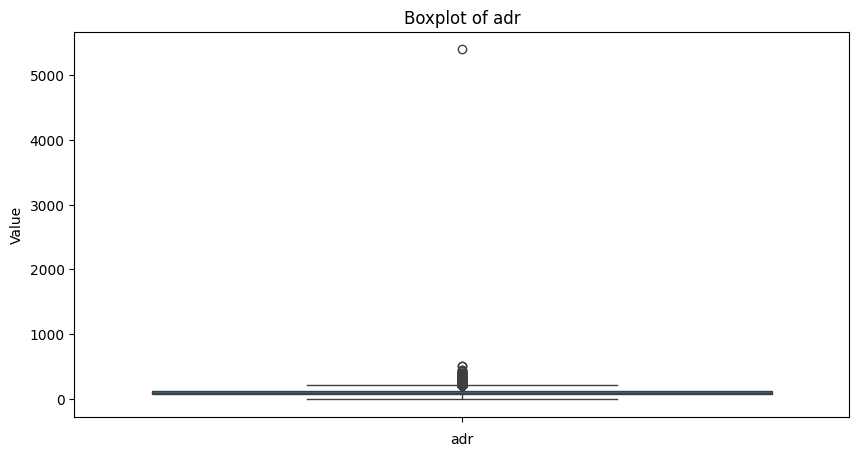

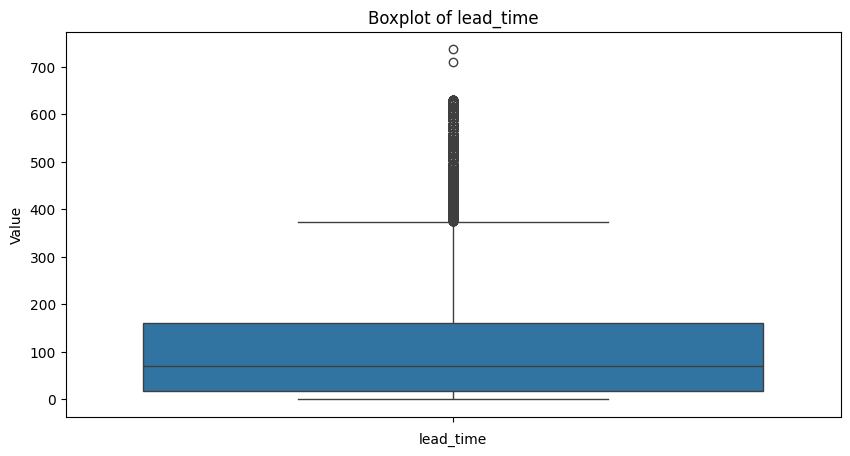

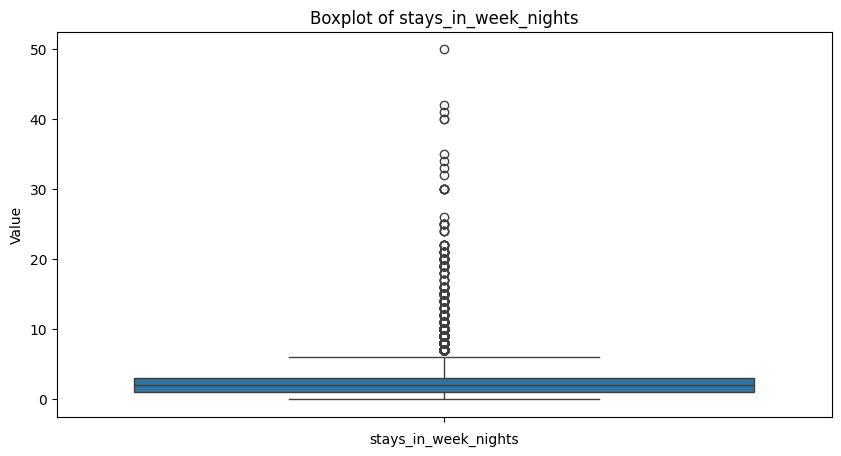

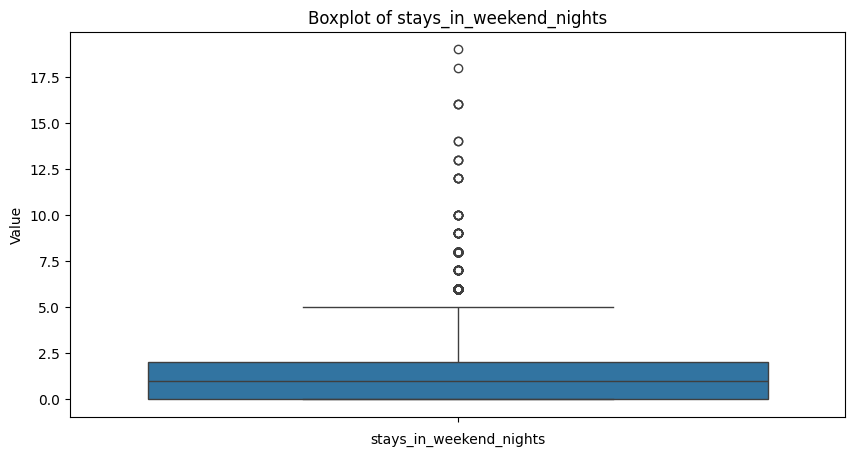

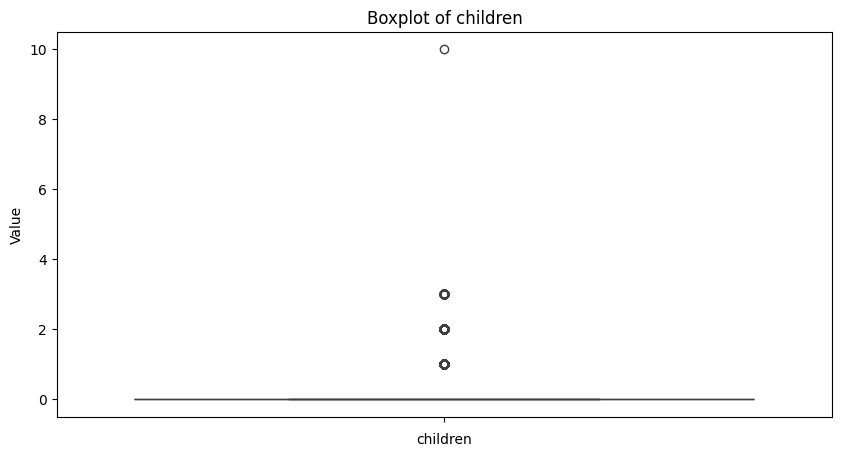

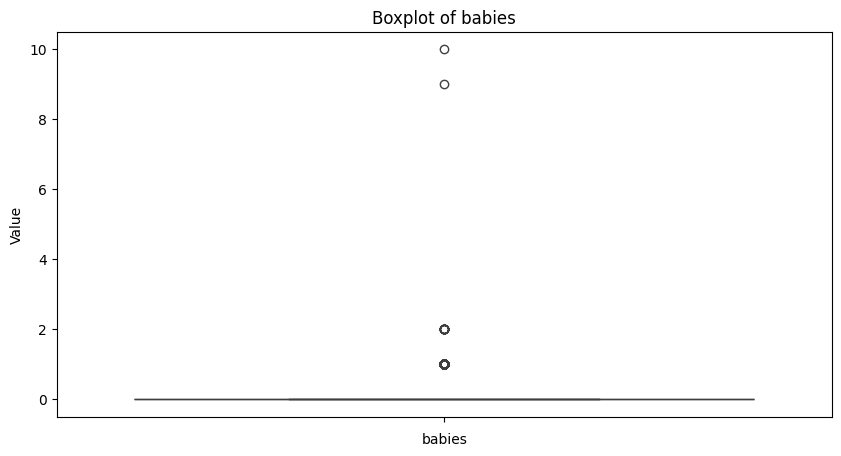

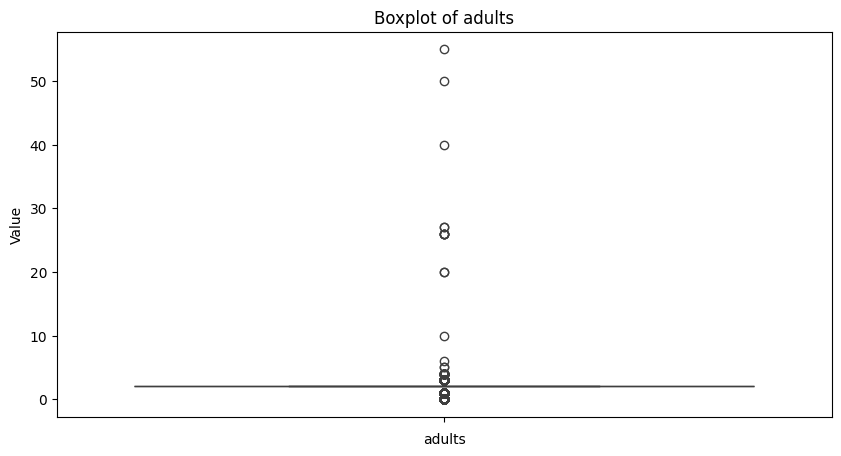

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kiểm tra ngoại lai ở các cột
for col in ['adr', 'lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights',
            'children', 'babies', 'adults']:
            plt.figure(figsize=(10, 5))
            sns.boxplot(df[col])
            plt.title(f'Boxplot of {col}')
            plt.xlabel(col)
            plt.ylabel('Value')
            plt.show()


Biến thiếu nhiều chính là các biến: `company`, `agent`, `country`
Biến `arrival_date_month` có thuyển chuyền thành `arrival_date_month_num`

## **1.6. Kiểm tra chất lượng dữ liệu**

Dữ liệu phù hợp cho các bài toán  
* Phân loại
* Phân cụm
* Luật kết hợp
* Chuỗi thời gian

Các vấn đề cần xử lý ở bước sau chính là xử lý giá trị bị thiếu ở các cột `children`, `babies`, `country` có thể loại bỏ các dữ liệu không hợp lệ. Loại bỏ các giá trị ngoại lai. Xoá các cột không sử dụng để huấn luyện model